In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/home/sean/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.1


In [4]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 4s 3us/step


In [12]:
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = {v:k for k, v in word_index.items()}
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [13]:
decode_review(train_data[0])

"<START> to was br who actress rate shouldn't historical she mother nicholson even synopsis ? director be girl ? with its who leads watch about documentary <UNK> ? he i'd money ? should ? makes watch didn't <UNK> mind stupid at ? makes arrived dancing in obviously all of entertaining ? seems about br ? such sea i to was ? ladies pokemon example ? was story do a br who actress all can is of immediately ? was in flick in a br running it <UNK> ? up start a ? version ? could ? ? president interactions br i'd even laurel his ? know a br all song ? with best it's be your or with aspects his ? was a without film were out ? to keep br much <UNK> ? ? any many btw is girl ? <UNK> ? providing ? miss be story who actress 4 movie terrible audience like ? ? <UNK> success of them also ? next is year don't are keaton there movie say ? got sour it ? almost was that better 4 movie i'd ? why not aim it it's be film isn't first with them ? almost she br all pieces also a br ending ? br wished two make are

In [14]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [16]:
decode_review(train_data[0])

"<START> to was br who actress rate shouldn't historical she mother nicholson even synopsis ? director be girl ? with its who leads watch about documentary <UNK> ? he i'd money ? should ? makes watch didn't <UNK> mind stupid at ? makes arrived dancing in obviously all of entertaining ? seems about br ? such sea i to was ? ladies pokemon example ? was story do a br who actress all can is of immediately ? was in flick in a br running it <UNK> ? up start a ? version ? could ? ? president interactions br i'd even laurel his ? know a br all song ? with best it's be your or with aspects his ? was a without film were out ? to keep br much <UNK> ? ? any many btw is girl ? <UNK> ? providing ? miss be story who actress 4 movie terrible audience like ? ? <UNK> success of them also ? next is year don't are keaton there movie say ? got sour it ? almost was that better 4 movie i'd ? why not aim it it's be film isn't first with them ? almost she br all pieces also a br ending ? br wished two make are

In [17]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 81us/step - loss: 0.6937 - acc: 0.5097 - val_loss: 0.6916 - val_acc: 0.5675
Epoch 2/40
15000/15000 [==============================] - 1s 38us/step - loss: 0.6902 - acc: 0.5623 - val_loss: 0.6887 - val_acc: 0.6248
Epoch 3/40
15000/15000 [==============================] - 1s 38us/step - loss: 0.6869 - acc: 0.6123 - val_loss: 0.6860 - val_acc: 0.5729
Epoch 4/40
15000/15000 [==============================] - 1s 41us/step - loss: 0.6831 - acc: 0.6648 - val_loss: 0.6827 - val_acc: 0.5375
Epoch 5/40
15000/15000 [==============================] - 1s 40us/step - loss: 0.6784 - acc: 0.6775 - val_loss: 0.6766 - val_acc: 0.7326
Epoch 6/40
15000/15000 [==============================] - 1s 44us/step - loss: 0.6717 - acc: 0.7453 - val_loss: 0.6695 - val_acc: 0.7430
Epoch 7/40
15000/15000 [==============================] - 1s 36us/step - loss: 0.6623 - acc: 0.7563 - val_loss: 0.6566 - val_acc

In [21]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 0s 17us/step
[0.30553158888816834, 0.87468]


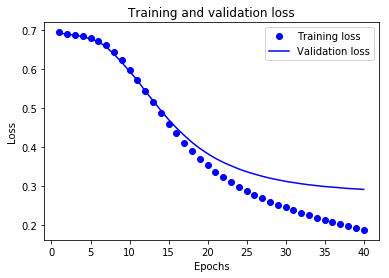

In [25]:
history_dict = history.history
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


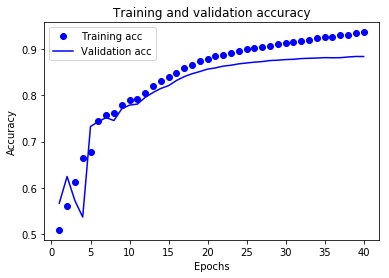

In [26]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()